# Assignment 2 - Stock Predictions

In [17]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

import datetime
#import pandas_datareader.data as web
from pandas_datareader import data as pdr
import yfinance as yf
#from pandas import Series, DataFrame
#import seaborn as sns

In [18]:
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
# Gradient boosting regularization
from sklearn import ensemble
from sklearn import datasets
# Decision tree regression with adaboost
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [19]:
# download stock price dataset we want to predict
stock_name = 'AAPL'
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2019, 9, 6)

yf.pdr_override()
df_full = pdr.get_data_yahoo(stock_name, start=start, end=end).reset_index()
df_full.to_csv(stock_name+'.csv',index=False)
df_full.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,170.16,172.30,169.26,172.26,167.70,25555900
1,2018-01-03,172.53,174.55,171.96,172.23,167.67,29517900
2,2018-01-04,172.54,173.47,172.08,173.03,168.45,22434600
3,2018-01-05,173.44,175.37,173.05,175.00,170.37,23660000
4,2018-01-08,174.35,175.61,173.93,174.35,169.74,20567800


In [20]:
cols = list(df_full.columns)
b, a = cols.index('Adj Close'), cols.index('Volume')
cols[b], cols[a] = cols[a], cols[b]
df_full = df_full[cols]
#df_full = df_full.reset_index(drop=True)
df_full.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2018-01-02,170.16,172.30,169.26,172.26,25555900,167.70
1,2018-01-03,172.53,174.55,171.96,172.23,29517900,167.67
2,2018-01-04,172.54,173.47,172.08,173.03,22434600,168.45
3,2018-01-05,173.44,175.37,173.05,175.00,23660000,170.37
4,2018-01-08,174.35,175.61,173.93,174.35,20567800,169.74


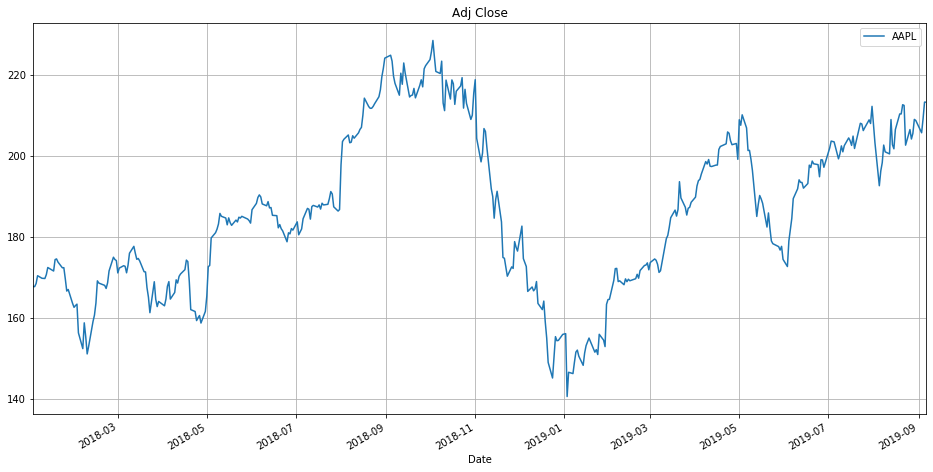

In [21]:
#fig = plt.plot()

#plt.legend([stock_name, stock_name+"_MA"]);

df_full.set_index('Date', inplace=True)
df_raw = df_full[df_full.columns[-1]]
df_raw.plot(label=stock_name, figsize=(16,8), title=df_full.columns[-1], grid=True, legend=True)

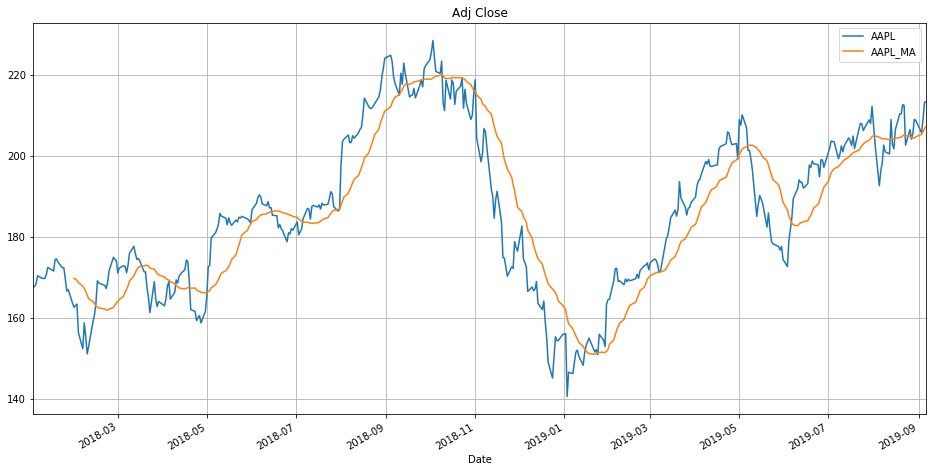

In [22]:
# plot moving average
window = 20
df_MA = df_full[df_full.columns[-1]].rolling(window).mean()
df_raw.plot(label=stock_name, figsize=(16,8), title=df_full.columns[-1], grid=True, legend=True)
df_MA.plot(label=stock_name+'_MA', figsize=(16,8), title=df_full.columns[-1], grid=True, legend=True)

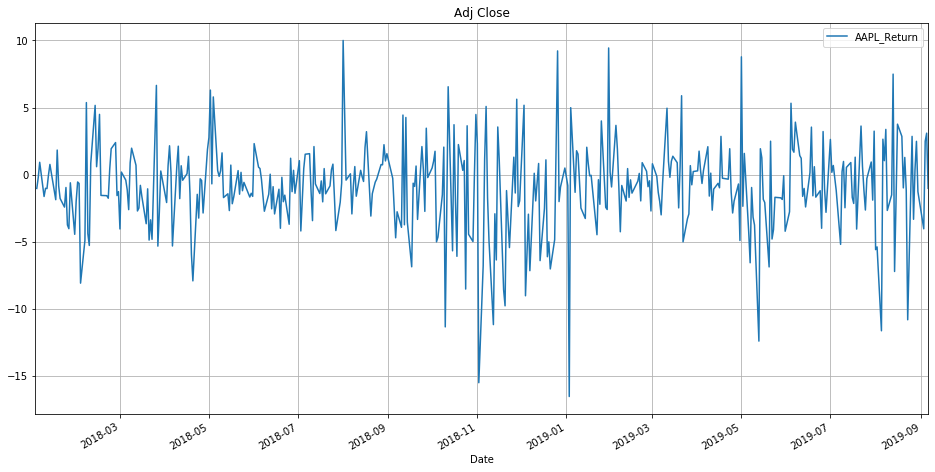

In [23]:
# plot return deviation
df_ret = df_full[df_full.columns[-1]] - df_full[df_full.columns[-1]].shift(1) - 1
df_ret.plot(label=stock_name+'_Return', figsize=(16,8), title=df_full.columns[-1], grid=True, legend=True)

In [24]:
# train/test split

X = df_full.iloc[:,:-1].to_numpy() 
y = df_full.iloc[:,-1].to_numpy() 

num_data = df_full.shape[0]
split_ratio = 0.8
ind_split = int(split_ratio * num_data)

X_train = X[:ind_split]
y_train = y[:ind_split].reshape(-1,1)
X_test = X[ind_split:]
y_test = y[ind_split:].reshape(-1,1)

split_time = df_full.index[ind_split]

### Linear regression model

Training RMSE is: 1.013828
Testing RMSE is: 2.490184


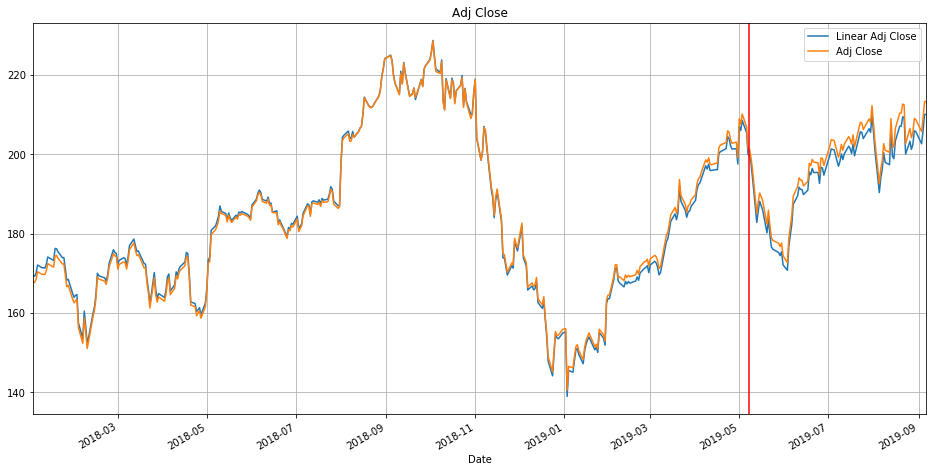

In [25]:
# build Linear regression model
# training
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)

# testing
trainings = reg_linear.predict(X_train).reshape(-1,1)
predictions = reg_linear.predict(X_test).reshape(-1,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_linear = pd.DataFrame(all_pred, columns=['Linear '+df_full.columns[-1]], index=df_full.index)
df_linear[df_full.columns[-1]] = y

# plot results and add train/test split timing line
df_linear.plot(label=stock_name+'_Linear', figsize=(16,8), title=df_full.columns[-1], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse = pd.DataFrame([train_rmse, test_rmse], columns=['Linear'], index=['training', 'testing'])

### Ridge regression model

Training RMSE is: 1.013829
Testing RMSE is: 2.489891


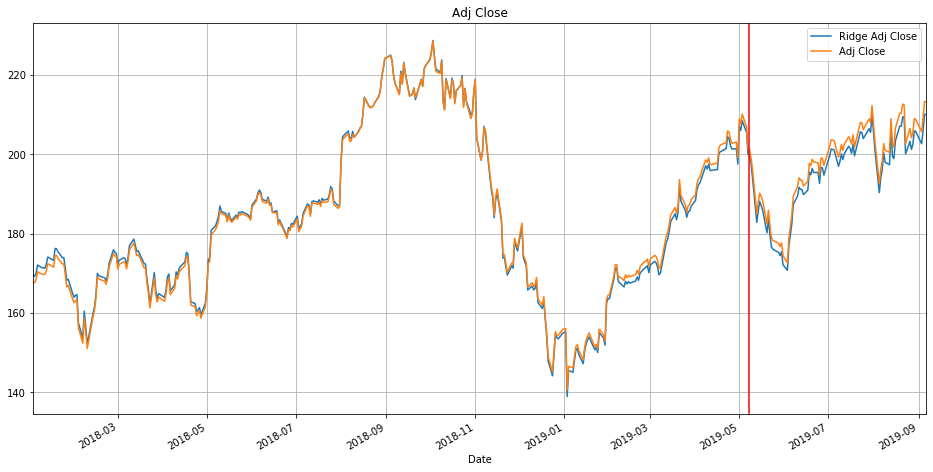

In [26]:
# build Ridge regression model
# training
reg_ridge = Ridge(alpha=.5)
reg_ridge.fit(X_train, y_train)

# testing
trainings = reg_ridge.predict(X_train).reshape(-1,1)
predictions = reg_ridge.predict(X_test).reshape(-1,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_ridge = pd.DataFrame(all_pred, columns=['Ridge '+df_full.columns[-1]], index=df_full.index)
df_ridge[df_full.columns[-1]] = y

# plot results and add train/test split timing line
df_ridge.plot(label=stock_name+'_Ridge', figsize=(16,8), title=df_full.columns[-1], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['Ridge'] = [train_rmse, test_rmse]

### Lasso model

Training RMSE is: 1.023757
Testing RMSE is: 2.496324


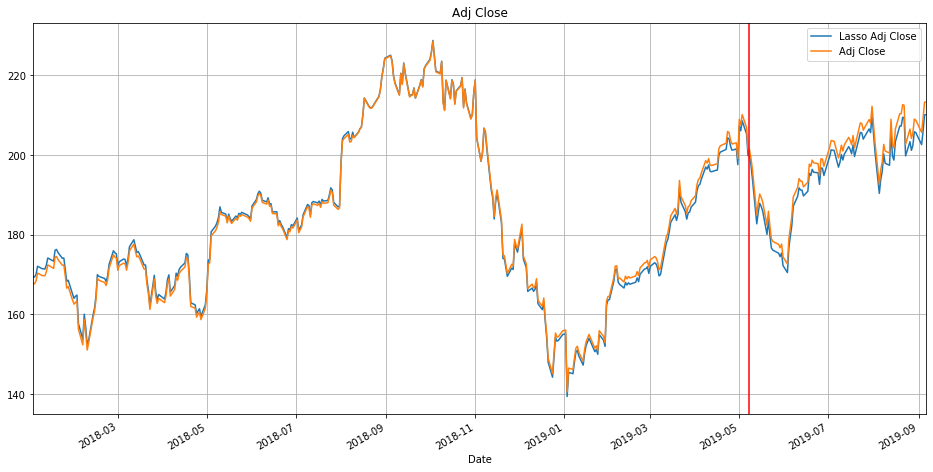

In [27]:
# build Lasso regression model
# training
reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(X_train, y_train)

# testing
trainings = reg_lasso.predict(X_train).reshape(-1,1)
predictions = reg_lasso.predict(X_test).reshape(-1,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_lasso = pd.DataFrame(all_pred, columns=['Lasso '+df_full.columns[-1]], index=df_full.index)
df_lasso[df_full.columns[-1]] = y

# plot results and add train/test split timing line
df_lasso.plot(label=stock_name+'_Lasso', figsize=(16,8), title=df_full.columns[-1], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['Lasso'] = [train_rmse, test_rmse]

### KNN model

Training RMSE is: 17.932188
Testing RMSE is: 18.621856


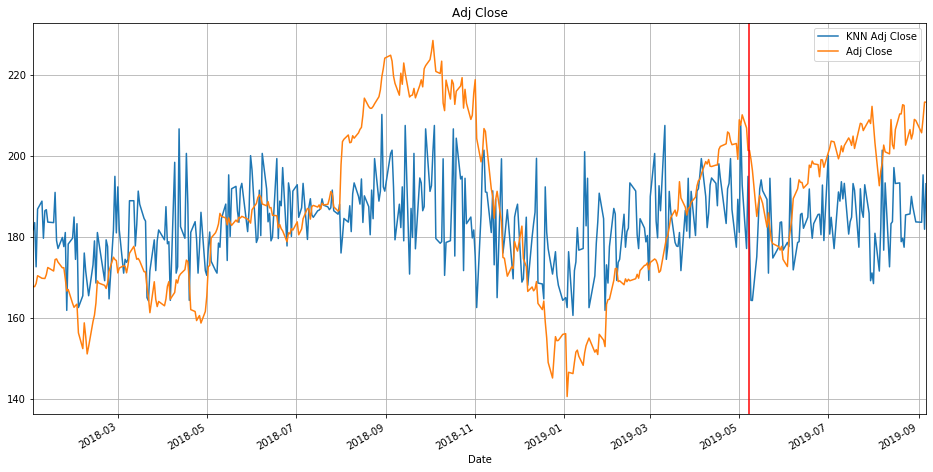

In [28]:
# build KNN regression model
# training
reg_knn = KNeighborsRegressor(n_neighbors=4)
reg_knn.fit(X_train, y_train)

# testing
trainings = reg_knn.predict(X_train).reshape(-1,1)
predictions = reg_knn.predict(X_test).reshape(-1,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_knn = pd.DataFrame(all_pred, columns=['KNN '+df_full.columns[-1]], index=df_full.index)
df_knn[df_full.columns[-1]] = y

# plot results and add train/test split timing line
df_knn.plot(label=stock_name+'_KNN', figsize=(16,8), title=df_full.columns[-1], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['KNN'] = [train_rmse, test_rmse]



## Decision Tree Regression

Training RMSE is: 1.834637
Testing RMSE is: 2.406939


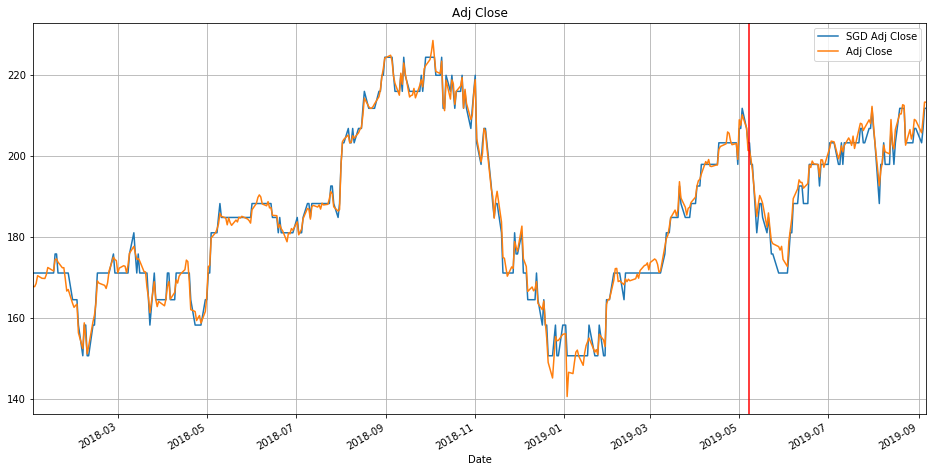

In [29]:
# build Decision Tree Regression model
# training
reg_dtr = DecisionTreeRegressor(max_depth=4)
reg_dtr.fit(X_train, y_train)

# testing
trainings = reg_dtr.predict(X_train).reshape(-1,1)
predictions = reg_dtr.predict(X_test).reshape(-1,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_dtr = pd.DataFrame(all_pred, columns=['SGD '+df_full.columns[-1]], index=df_full.index)
df_dtr[df_full.columns[-1]] = y

# plot results and add train/test split timing line
df_dtr.plot(label=stock_name+'SGD', figsize=(16,8), title=df_full.columns[-1], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['DTR'] = [train_rmse, test_rmse]

## Adaboosting

C:\Users\ZAP-DS\Anaconda3\envs\tf-test\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training RMSE is: 0.840343
Testing RMSE is: 1.965542


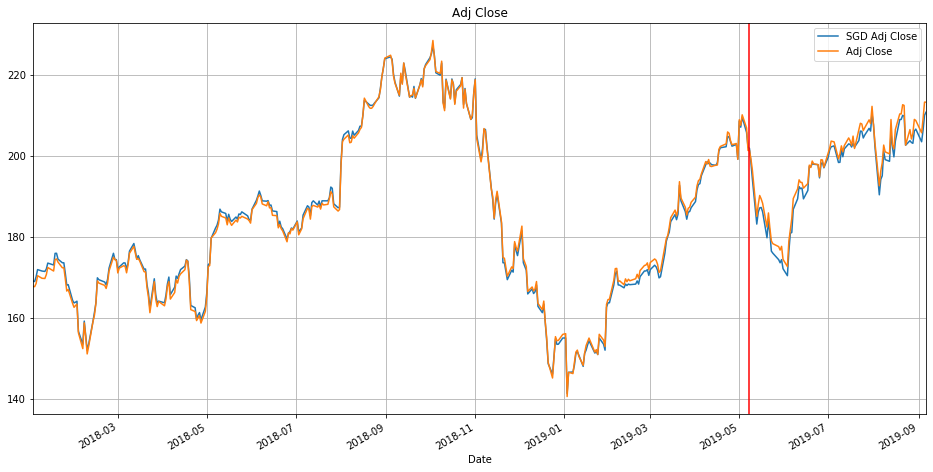

In [30]:
# build Decision Tree Regression model
# training
rng = np.random.RandomState(1)
reg_ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=300, random_state=rng)
reg_ada.fit(X_train, y_train)

# testing
trainings = reg_ada.predict(X_train).reshape(-1,1)
predictions = reg_ada.predict(X_test).reshape(-1,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_ada = pd.DataFrame(all_pred, columns=['SGD '+df_full.columns[-1]], index=df_full.index)
df_ada[df_full.columns[-1]] = y

# plot results and add train/test split timing line
df_ada.plot(label=stock_name+'SGD', figsize=(16,8), title=df_full.columns[-1], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['ADA'] = [train_rmse, test_rmse]

## Bayesian Ridge Regression

C:\Users\ZAP-DS\Anaconda3\envs\tf-test\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training RMSE is: 1.013922
Testing RMSE is: 2.487456


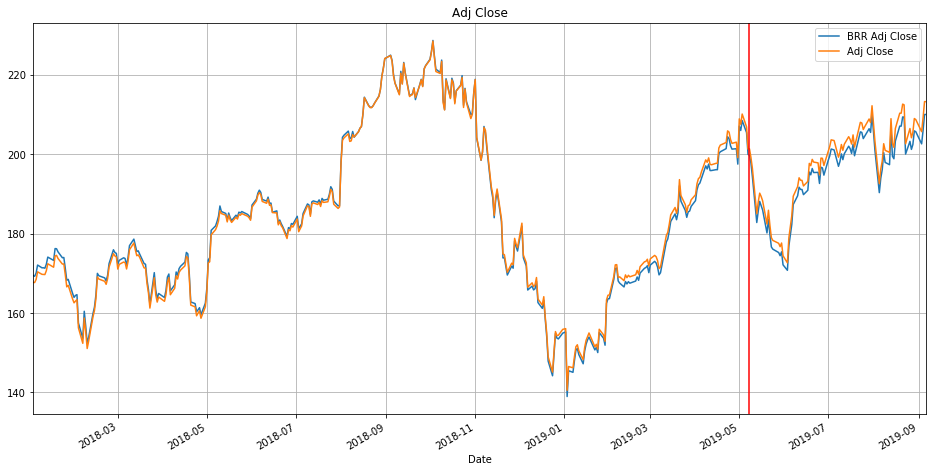

In [31]:
# build Bayesian Ridge Regression model
# training
reg_brr = BayesianRidge()
reg_brr.fit(X_train, y_train)

# testing
trainings = reg_brr.predict(X_train).reshape(-1,1)
predictions = reg_brr.predict(X_test).reshape(-1,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_brr = pd.DataFrame(all_pred, columns=['BRR '+df_full.columns[-1]], index=df_full.index)
df_brr[df_full.columns[-1]] = y

# plot results and add train/test split timing line
df_brr.plot(label=stock_name+'BRR', figsize=(16,8), title=df_full.columns[-1], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['BRR'] = [train_rmse, test_rmse]

## Plotting the predictions

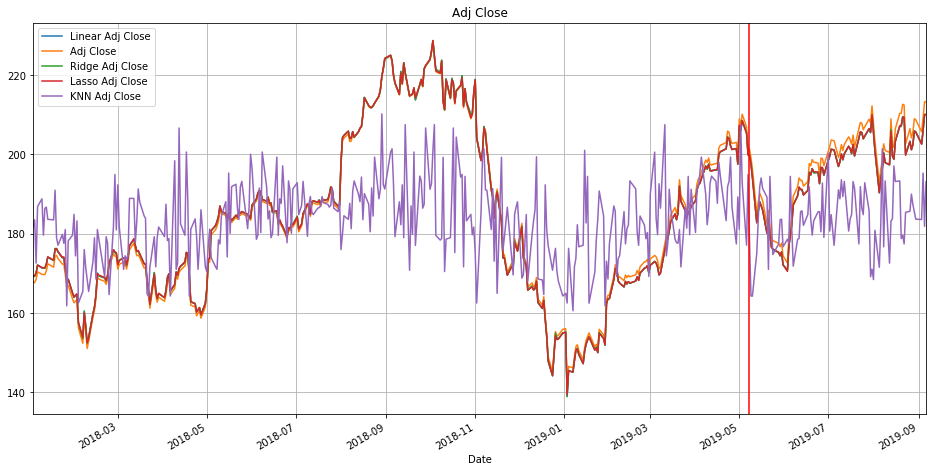

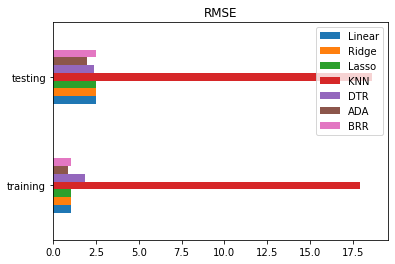

In [32]:
# visualize all models in one plot
df_all = df_linear
df_all[df_ridge.columns[0]] = df_ridge[df_ridge.columns[0]]
df_all[df_lasso.columns[0]] = df_lasso[df_lasso.columns[0]]
df_all[df_knn.columns[0]] = df_knn[df_knn.columns[0]]





# plot results and add train/test split timing line
df_all.plot(label=stock_name, figsize=(16,8), title=df_all.columns[1], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

df_rmse.plot(kind='barh', title='RMSE')

We can see from the above comparison plot that KNN is not a good at predicting Apple stock while the other regression methods and ensemble methods are much better. Let's look at the numbers.

In [33]:
df_rmse.head()

,Linear,Ridge,Lasso,KNN,DTR,ADA,BRR
training,1.013828,1.013829,1.023757,17.932188,1.834637,0.840343,1.013922
testing,2.490184,2.489891,2.496324,18.621856,2.406939,1.965542,2.487456


Looking at the numbers you can see that KNN is an order of magnitude larger than every other regression or ensemble model. Let's plot without KNN in this case.

In [37]:
df_rmse_noKNN = df_rmse.copy()
df_rmse_noKNN = df_rmse_noKNN.drop('KNN', axis=1)

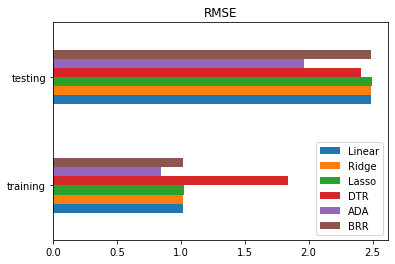

In [38]:
df_rmse_noKNN.plot(kind='barh', title='RMSE')

Now we can see that Adaboosting is better than the others in training and testing.